In [40]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
%autoreload

In [30]:
from params import FuzzyInputVariable_List_Trapezoids
import numpy as np
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from optimizers.default import DefaultOptimizer
from optimizers.genetic import GeneticOptimizer, SmallestMaeErrorFitness, MultiPointCrossing, NRandomChangesMutation, RouletteWheelSelection, RankSelection

In [31]:
%matplotlib auto
%matplotlib inline

Using matplotlib backend: <object object at 0x00000218A728F8A0>


In [35]:
def generate_data(size, plot=False):
    x = np.arange(1, size, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))
    data_labels = np.round(dataX) * np.round(dataY)
    
    if plot:
        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111, projection='3d')
        rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]
        ax.scatter(dataX, dataY, data_labels, c=rgb)
        plt.show()
    
    return dataXY, data_labels

In [44]:
def test_optimizer(optimizer, size=4):
    # prepare data
    dataXY, data_labels = generate_data(size)
    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

    # create anfis
    mf1 = [[0.5+i, 0.5, 0.5, 0.5] for i in range(size)]
    var_names = [str(i) for i in range(size)]
    varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", var_names)
    varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", var_names)
    fis = ANFIS([varX, varY], X_train.T, y_train)

    # train
    start = time.time()
    fis.train(optimizer)
    elapsed_time = time.time() - start

    # evaluate on train data
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = np.round(y_pred.flatten())
    train_accuracy = accuracy_score(y_train, y_pred)
    fis.show_results()

    # evaluate on test data
    fis.training_data = X_test.T
    fis.expected_labels = y_test
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = np.round(y_pred.flatten())
    test_accuracy = accuracy_score(y_test, y_pred)

    # print result
    print(f'Train data accuracy: {train_accuracy:.2f}')
    print(f'Test data accuracy: {test_accuracy:.2f}')
    print(f'Training time: {elapsed_time:.2f}')

C:\Users\Lukasz\OneDrive - Politechnika Łódzka\siium\semestr-2\msi\labs\exercises\anfis-genetic\ANFIS.py:90: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optimizing 80 parameters


Evolution:   0%|          | 2/5000 [00:00<04:27, 18.69it/s]

0.0008823941841039033


Evolution:   2%|▏         | 105/5000 [00:05<04:08, 19.72it/s]

0.0014966482503515012


Evolution:   4%|▍         | 204/5000 [00:10<04:01, 19.83it/s]

0.0017515178392453561


Evolution:   6%|▌         | 303/5000 [00:15<03:55, 19.95it/s]

0.0019489833750329397


Evolution:   8%|▊         | 404/5000 [00:20<03:50, 19.90it/s]

0.002023715035429963


Evolution:  10%|█         | 505/5000 [00:25<03:43, 20.15it/s]

0.0020871251066724465


Evolution:  12%|█▏        | 603/5000 [00:30<03:37, 20.19it/s]

0.0021440837628668714


Evolution:  14%|█▍        | 703/5000 [00:35<03:35, 19.98it/s]

0.002188542564972872


Evolution:  16%|█▌        | 804/5000 [00:40<03:41, 18.92it/s]

0.002231785386479501


Evolution:  18%|█▊        | 905/5000 [00:46<03:34, 19.05it/s]

0.0022367664645121517


Evolution:  20%|██        | 1004/5000 [00:51<03:26, 19.35it/s]

0.0022728038498777835


Evolution:  22%|██▏       | 1104/5000 [00:56<03:21, 19.38it/s]

0.0022728038498777835


Evolution:  24%|██▍       | 1203/5000 [01:01<03:25, 18.51it/s]

0.0022728038498777835


Evolution:  26%|██▌       | 1303/5000 [01:06<03:02, 20.30it/s]

0.002279616877560499


Evolution:  28%|██▊       | 1403/5000 [01:11<03:21, 17.88it/s]

0.002279616877560499


Evolution:  30%|███       | 1502/5000 [01:17<02:57, 19.76it/s]

0.00228602302116962


Evolution:  32%|███▏      | 1603/5000 [01:22<02:50, 19.96it/s]

0.0022886912704552765


Evolution:  34%|███▍      | 1703/5000 [01:27<02:47, 19.71it/s]

0.002295399308907473


Evolution:  36%|███▌      | 1804/5000 [01:32<02:48, 19.00it/s]

0.002295399308907473


Evolution:  38%|███▊      | 1903/5000 [01:37<02:42, 19.07it/s]

0.0022995071592055096


Evolution:  40%|████      | 2004/5000 [01:43<02:38, 18.90it/s]

0.0023527329561748756


Evolution:  42%|████▏     | 2104/5000 [01:48<02:33, 18.84it/s]

0.0023653878745983573


Evolution:  44%|████▍     | 2203/5000 [01:53<02:40, 17.40it/s]

0.0023666097214121388


Evolution:  46%|████▌     | 2303/5000 [01:58<02:16, 19.81it/s]

0.0023666097214121388


Evolution:  48%|████▊     | 2403/5000 [02:03<02:13, 19.51it/s]

0.0023777617330989573


Evolution:  50%|█████     | 2504/5000 [02:08<02:07, 19.65it/s]

0.0023778047695238377


Evolution:  52%|█████▏    | 2604/5000 [02:13<01:58, 20.28it/s]

0.0023778047695238377


Evolution:  54%|█████▍    | 2704/5000 [02:18<01:52, 20.47it/s]

0.00237793019400445


Evolution:  56%|█████▌    | 2804/5000 [02:23<01:47, 20.50it/s]

0.0023796572392593145


Evolution:  58%|█████▊    | 2904/5000 [02:29<01:43, 20.22it/s]

0.0023796572392593145


Evolution:  60%|██████    | 3003/5000 [02:33<01:38, 20.35it/s]

0.00238053968243951


Evolution:  62%|██████▏   | 3104/5000 [02:39<01:35, 19.83it/s]

0.00238053968243951


Evolution:  64%|██████▍   | 3205/5000 [02:44<01:31, 19.68it/s]

0.0023806770968306887


Evolution:  66%|██████▌   | 3302/5000 [02:48<01:24, 20.05it/s]

0.00239664953136011


Evolution:  68%|██████▊   | 3403/5000 [02:54<01:20, 19.87it/s]

0.002403044831592398


Evolution:  70%|███████   | 3503/5000 [02:59<01:15, 19.92it/s]

0.0024040412495673815


Evolution:  72%|███████▏  | 3603/5000 [03:04<01:11, 19.44it/s]

0.002404042653484114


Evolution:  74%|███████▍  | 3704/5000 [03:09<01:03, 20.39it/s]

0.002404042653484114


Evolution:  76%|███████▌  | 3803/5000 [03:14<01:01, 19.47it/s]

0.0025082152123480773


Evolution:  78%|███████▊  | 3904/5000 [03:19<00:57, 19.11it/s]

0.0025715956271109707


Evolution:  80%|████████  | 4003/5000 [03:24<00:48, 20.42it/s]

0.0025936767545907224


Evolution:  82%|████████▏ | 4103/5000 [03:29<00:43, 20.70it/s]

0.002602015234635718


Evolution:  84%|████████▍ | 4204/5000 [03:34<00:38, 20.44it/s]

0.0026114414461880634


Evolution:  86%|████████▌ | 4304/5000 [03:39<00:34, 20.04it/s]

0.0026119231650726955


Evolution:  88%|████████▊ | 4405/5000 [03:44<00:29, 19.88it/s]

0.0026398763980685813


Evolution:  90%|█████████ | 4503/5000 [03:49<00:25, 19.73it/s]

0.00270541708892621


Evolution:  92%|█████████▏| 4602/5000 [03:54<00:19, 20.59it/s]

0.0027199063977733735


Evolution:  94%|█████████▍| 4702/5000 [03:59<00:14, 20.29it/s]

0.0027313598541526796


Evolution:  96%|█████████▌| 4803/5000 [04:04<00:09, 19.84it/s]

0.002743066130061784


Evolution:  98%|█████████▊| 4904/5000 [04:09<00:04, 20.78it/s]

0.0027782256684317835


Evolution: 100%|██████████| 5000/5000 [04:13<00:00, 19.70it/s]


Optimization finished after 253.80s


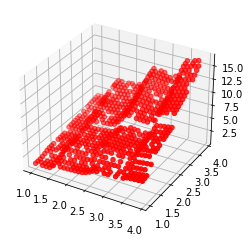

Train data accuracy: 0.62
Test data accuracy: 0.61
Training time: 253.80


In [47]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(3),
    NRandomChangesMutation(2),
    RouletteWheelSelection(),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=100,
    n_generations=5000,
    n_elite=2,
    learn_operators=False
)

test_optimizer(optimizer)

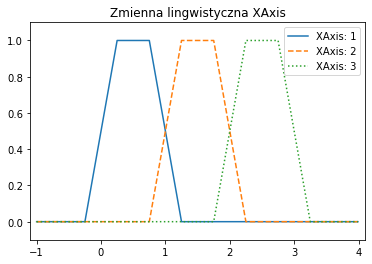

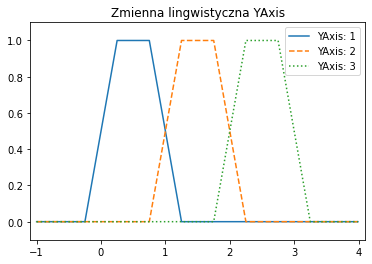

In [32]:



#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(start=-1, end=4)
plt.legend()

plt.figure()
varY.show(start=-1, end=4)
plt.legend()

plt.show()

Parametry początkowe:
Przesłanki:  [[[0.5, 0.5, 0.5, 0.5], [1.5, 0.5, 0.5, 0.5], [2.5, 0.5, 0.5, 0.5]], [[0.5, 0.5, 0.5, 0.5], [1.5, 0.5, 0.5, 0.5], [2.5, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.01184202 0.49650815 0.69705447]
 [0.19367237 0.62619699 0.91695311]
 [0.4235362  0.76714848 0.81169089]
 [0.44705056 0.42833819 0.91846   ]
 [0.24105467 0.97327127 0.23180706]
 [0.60875679 0.77272692 0.52493575]
 [0.71261623 0.29690725 0.96593512]
 [0.62339687 0.94277607 0.25432033]
 [0.88127743 0.68571913 0.06313432]]


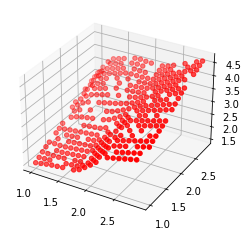

In [33]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
fis = ANFIS([varX, varY], X_train.T, y_train)
print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)
fis.show_results()

c:\Users\Lukasz\OneDrive - Politechnika Łódzka\siium\semestr-2\msi\labs\anfis1\ANFIS.py:89: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   31.178527331107087
Liczba ew:  193914
Liczba it:  50
TIME elapsed:  57.77447295188904


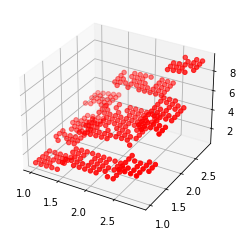

In [34]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

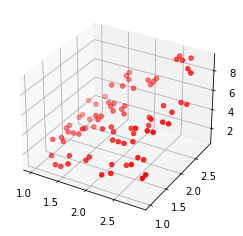

[[ 3  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 22  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0  6]]


In [35]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

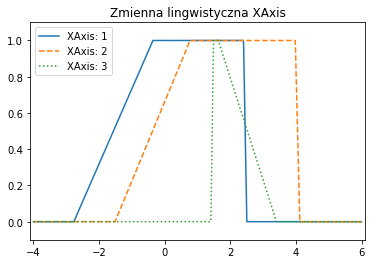

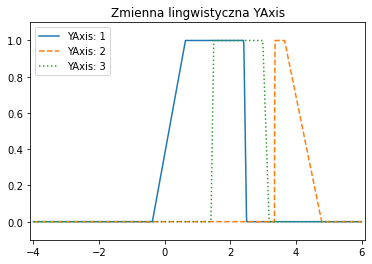

In [38]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(start=-4, end=6)
plt.legend()

plt.figure()
varY.show(start=-4, end=6)
plt.legend()

plt.show()

In [25]:
times = []
accuracies = []

for size in range(2, 6):
    dataXY, data_labels = generate_data(size)
    
    mf1 = [[0.5+i, 0.5, 0.5, 0.5] for i in range(size)]
    var_names = [str(i) for i in range(size)]
    varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", var_names)
    varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", var_names)
    
    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
    fis = ANFIS([varX, varY], X_train.T, y_train)
    
    start = time.time()
    fis.train(True, True, False, True, n_iter=50)
    elapsed_time = time.time() - start
    
    fis.training_data = X_test.T
    fis.expected_labels = y_test
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = np.round(y_pred.flatten())
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    
    times.append(elapsed_time)
    accuracies.append(accuracy)

c:\Users\Lukasz\OneDrive - Politechnika Łódzka\siium\semestr-2\msi\labs\anfis1\ANFIS.py:89: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   1.456862049889898
Liczba ew:  62737
Liczba it:  50
1.0


c:\Users\Lukasz\OneDrive - Politechnika Łódzka\siium\semestr-2\msi\labs\anfis1\ANFIS.py:89: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   14.894117636638512
Liczba ew:  222334
Liczba it:  50
1.0


c:\Users\Lukasz\OneDrive - Politechnika Łódzka\siium\semestr-2\msi\labs\anfis1\ANFIS.py:89: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   31.30702817973006
Liczba ew:  353732
Liczba it:  50
0.9944444444444445


c:\Users\Lukasz\OneDrive - Politechnika Łódzka\siium\semestr-2\msi\labs\anfis1\ANFIS.py:89: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   714.9023429932266
Liczba ew:  464130
Liczba it:  50
0.584375


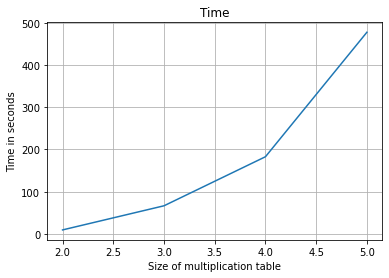

In [27]:
plt.plot(np.arange(2, 6), times)
plt.title('Time')
plt.xlabel('Size of multiplication table')
plt.ylabel('Time in seconds')
plt.grid()

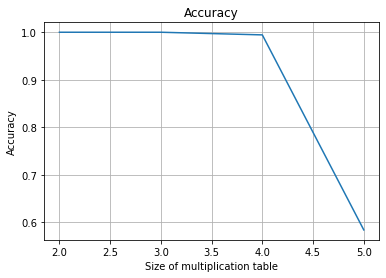

In [30]:
plt.plot(np.arange(2, 6), accuracies)
plt.title('Accuracy')
plt.xlabel('Size of multiplication table')
plt.ylabel('Accuracy')
plt.grid()